# Nasdaq Data Link API – Exploring Regional Financial Data

## 1. Introduction

In this project, we will extract financial data for a specific set of companies, with an emphasis on understanding their financial performance over time. We'll examine metrics such as the **accrued expenses turnover**, and explore how these values differ among companies and regions.

The [Nasdaq Data Link API](https://docs.data.nasdaq.com/docs/getting-started) provides access to a wide range of financial datasets, including comprehensive metrics on various companies. We will focus on the `MER/F1` datatable, which contains detailed financial information such as balance sheets, cash flow statements, and income statements.

Our main goal is to perform trend analysis and comparative studies on this financial data. We will retrieve, clean, and analyze the data, then create visualizations to effectively present our findings.

## 2. Reviewing the API Documentation and Credentials

The [Nasdaq Data Link API](https://docs.data.nasdaq.com/docs/getting-started) requires an API key for access. After creating an account on Nasdaq Data Link, we received our API key. To keep the key secure, we stored it in a separate Python file named `config.py`. First, let's import this file into our notebook to use the API key.

In [1]:
# Import and access the API key from `Config.py`
import Config
api_key = Config.API_KEY

With the API key in hand, the next task is to determine the appropriate API endpoint and the parameters needed to query the financial data. It's crucial to refer to the Nasdaq Data Link API documentation for guidance.

## 3. Querying the API Using an Endpoint and Parameters

Here's a summary of key findings from the Nasdaq Data Link API documentation:

* **Base URL Structure:**
   - `https://data.nasdaq.com/api/v3/datatables/MER/F1.json` – Access the `MER/F1` table in JSON format.
   
* **Optional Query Parameters:**
   - `qopts.per_page=10` – Limit rows per request to 10.
   - `ticker=SPY` – Filter by the `ticker` column value.
   - `ticker=SPY,IWM,GLD` – Filter rows by multiple ticker values.
   - `qopts.columns=ticker,date,shares_outstanding` – Specify columns in the response.

This summary provides an overview of the base URL structure and the optional query parameters for customizing data queries with the Nasdaq Data Link API, particularly for the `MER/F1` table.

In [2]:
# Import the relevant libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Set the display option to format floating-point numbers with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Define the API's URL for Nasdaq Data Link
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

# Set the parameters for the API request, including the API key and number of results per page
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10
}

# Make a GET request to the URL with the specified parameters, and get the response in JSON format
json_data = requests.get(api_url, params=parameters).json()
json_data

{'datatable': {'data': [[2438,
    1868192544,
    -1802,
    10.481948,
    '2011-06-30',
    'Q2',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2023-12-31',
    'Accrued Expenses Turnover',
    'Derived'],
   [2438,
    1868216112,
    -1802,
    8.161754,
    '2011-09-30',
    'Q3',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2023-12-31',
    'Accrued Expenses Turnover',
    'Derived']

The output provides a detailed snapshot of financial data for several companies, such as `Deutsche Bank AG` and `BCE Inc.`, over various quarters and years. Each entry contains comprehensive information, including financial metrics, report dates, currency, and additional company details like address and website.

Moreover, the dataset is well-structured with most columns being self-explanatory. The `meta` section includes a cursor ID for pagination, indicating there are more data entries to retrieve.

## 4. Processing the JSON Data into a DataFrame

If we inspect the first entry of the JSON data, we'll notice that for `Deutsche Bank AG`, in the second quarter of `2011`, the accrued expenses turnover ratio was `10.48`. This suggests that during this quarter, Deutsche Bank effectively managed its short-term liabilities by cycling through its accrued expenses roughly `10.48` times. A high turnover ratio like this implies efficient management of short-term obligations, provided this figure aligns with industry standards and the company's norms.

Next, we'll convert the JSON data received from the API into a DataFrame. This will allow us to handle and analyze the data more effectively, specifically trends in accrued expenses turnover across different companies. The JSON data structure shows that the `data` key holds the actual data in a list of lists format, where each inner list represents a row of data. The `columns` key contains a list of dictionaries, each providing the name and type of each column.

In [3]:
# Define the API endpoint URL, and the parameters for the API request
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10000}

# Send the API request and get the response in JSON format
json_data = requests.get(api_url, params=parameters).json()

# Extract data and column names from the JSON response
data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

# Create a pandas DataFrame from the extracted data, and display the first 3 rows
metrics_df = pd.DataFrame(data, columns=columns)
metrics_df.head(3)

compnumber    reportid  mapcode  amount  reportdate reporttype  \
0        2438  1868192544    -1802   10.48  2011-06-30         Q2   
1        2438  1868216112    -1802    8.16  2011-09-30         Q3   
2        2438  1885063456    -1802   10.79  2012-06-30         Q2   

  auditorstatus currency consolidated          longname  ...  \
0             U      EUR         True  Deutsche Bank AG  ...   
1             U      EUR         True  Deutsche Bank AG  ...   
2             U      EUR         True  Deutsche Bank AG  ...   

                city statecode country zipcode     phonenumber  \
0  Frankfurt am Main      None     DEU   60325  (49) 69 910 00   
1  Frankfurt am Main      None     DEU   60325  (49) 69 910 00   
2  Frankfurt am Main      None     DEU   60325  (49) 69 910 00   

            faxnumber     website         fye                  indicator  \
0  (49) 69 910 34 225  www.db.com  2023-12-31  Accrued Expenses Turnover   
1  (49) 69 910 34 225  www.db.com  2023-12-31  Accrued Expenses Turnover   
2  (49) 69 910 34 225  www.db.com  2023-12-31  Accrued Expenses Turnover   

  statement  
0   Derived  
1   Derived  
2   Derived  

[3 rows x 32 columns]

## 5. Exploring Data and Key Columns

Now that we have `10,000` rows of JSON data stored in a DataFrame, we can use various methods to work comfortably with our data. Therefore, we'd like to gain insights into the many columns of our dataset, and double-check the number of rows and columns.

In [4]:
# Display the shape and information about the DataFrame
print(metrics_df.shape, end="\n\n")
print(metrics_df.info())

(10000, 32)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 

Here's a detailed overview of the key columns in our dataset that will help us achieve our objectives:

| Column Name    | Description                                                                 |
|:---------------|:----------------------------------------------------------------------------|
| **longname**   | Name of the bank or company                                                 |
| **country**    | Country where the company is located (e.g., `DEU`, `CAN`)                   |
| **region**     | Region where the company is located (e.g., `Europe`, `North America`)       |
| **reportid**   | ID associated with a specific financial report                              |
| **reportdate** | Date of the financial report                                                |
| **reporttype** | Type of the financial report (e.g., `Q1`, `Q2`)                          |
| **amount**     | Value of a financial metric (e.g., `accrued expenses turnover`)             |
| **indicator**  | Specific financial indicator being reported                                 |
| **statement**  | Type of financial statement from which the data is derived                  |

In [5]:
# Define a list of key columns for analysis
key_columns = ['longname', 'country', 'region', 'reportid', 'reportdate',
               'reporttype', 'amount', 'indicator', 'statement']

These columns are crucial for our goals as they provide essential information about the financial reports, including their IDs, dates, and types. Additionally, they offer insights into the financial metrics being reported, the companies involved, and their geographical locations. This information will enable us to analyze trends, compare performances, and derive valuable insights for our decision-making processes.

## 6. Filtering the DataFrame for Analysis

Now that we have identified the essential columns for analyzing financial trends and making regional comparisons, the next step is to refine our analysis. Since our primary focus is on **accrued expenses turnover**, we'll filter the DataFrame to include only rows that mention this financial metric.

The accrued expenses turnover is a key financial efficiency ratio. It measures how often a company pays off its accrued expenses within a certain period, providing insights into:

- `Cash flow management` – it indicates how well a company is managing cash flow in relation to short-term obligations. A higher ratio suggests efficient management and a strong liquidity position.
- `Operational efficiency` – this reflects a company's operational efficiency, showing how promptly it settles its short-term debts.
- `Financial health` – regular payment of accrued expenses signifies good financial health and creditworthiness, which is essential for maintaining good supplier relationships and business stability.

In [6]:
# Filter the DataFrame to include only the key columns and rows related to 'Accrued Expenses Turnover'
filtered_df = metrics_df[key_columns]
filtered_df = filtered_df[filtered_df['indicator'] == 'Accrued Expenses Turnover']

# Get summary statistics for the filtered DataFrame
filtered_df.describe(include='all')

longname country         region      reportid  reportdate reporttype  \
count         139     139            139        139.00         139        139   
unique          8       7              4           NaN          58          5   
top     Canon Inc     USA  Latin America           NaN  2011-12-31          A   
freq           27      31             50           NaN           8         34   
mean          NaN     NaN            NaN 1633594306.53         NaN        NaN   
std           NaN     NaN            NaN  138528257.87         NaN        NaN   
min           NaN     NaN            NaN 1504051200.00         NaN        NaN   
25%           NaN     NaN            NaN 1543963136.00         NaN        NaN   
50%           NaN     NaN            NaN 1581646336.00         NaN        NaN   
75%           NaN     NaN            NaN 1622540544.00         NaN        NaN   
max           NaN     NaN            NaN 1952498480.00         NaN        NaN   

        amount                  indicator statement  
count   139.00                        139       139  
unique     NaN                          1         1  
top        NaN  Accrued Expenses Turnover   Derived  
freq       NaN                        139       139  
mean     26.91                        NaN       NaN  
std      33.10                        NaN       NaN  
min       4.69                        NaN       NaN  
25%       9.68                        NaN       NaN  
50%      13.75                        NaN       NaN  
75%      31.78                        NaN       NaN  
max     229.81                        NaN       NaN

The dataset comprises `139` entries related to accrued expenses turnover, with `Canon Inc` appearing most frequently. Also, companies are spread across `7` countries and `4` regions, with the `USA` and `Latin America` having the highest representations.

The report dates vary, and the report types are mostly annual, denoted by `A`. The amount for accrued expenses turnover ranges widely, with a mean of `26.91` and a high standard deviation of `33.10`, indicating significant variability. Moreover, the values span from a minimum of `4.69` to a maximum of `229.81`, showing a broad distribution in the financial metric across different companies and periods.

## 7. Enhancing the Filtered DataFrame

Enhancing the information quality of our DataFrame is crucial for clear analysis and reporting. First, we'll modify the `country` column to contain full country names. Currently, the column uses abbreviated country codes, which might not be immediately recognizable. On the other hand, using full country names will make the data more understandable and accessible. Second, we'll rename the column names to improve readability.

In [7]:
# Define a function to update country codes to full country names
def update_country_code(country):
    if country == 'USA':
        country = 'United States of America'
    elif country == 'JPN':
        country = 'Japan'
    elif country == 'DEU':
        country = 'Germany'
    elif country == 'CYM':
        country = 'Cayman Islands'
    elif country == 'BHS':
        country = 'Bahamas'
    else:
        country = 'Ireland'
    return country

# Apply the `update_country_code` function to the 'country' column
filtered_df = filtered_df.copy()
filtered_df['country'] = filtered_df['country'].apply(update_country_code)

# Rename the columns for better readability
filtered_df.columns = ['company_name', 'country', 'region', 'report_id', 'report_date',
                       'report_type', 'amount', 'indicator', 'statement']

# Create a copy of the DataFrame with the updated country names,
# and display the frequency of unique country names
updated_df = filtered_df.copy()
updated_df['country'].value_counts()

country
United States of America    31
Ireland                     29
Japan                       27
Cayman Islands              27
Bahamas                     19
Germany                      6
Name: count, dtype: int64

The updated DataFrame shows that the majority of companies are from the `United States of America`, followed by `Ireland`, `Japan`, and the `Cayman Islands`. Additionally, there are fewer companies from the `Bahamas`, with only `6` from `Germany`.

## 8. Visualizing the Yearly Accrued Expenses Turnover Trends

In business analysis and decision-making, understanding the evolution of certain financial metrics over a time frame is crucial. This insight allows analysts and decision-makers to identify patterns, assess the health and performance of a business, and make informed predictions about future trends.

Focusing on a specific time period enables analysts to conduct a more detailed and relevant analysis, as different periods can exhibit varying trends due to factors such as market conditions, seasonal effects, or company-specific events.

Since our updated DataFrame covers from the beginning of `2011` to the end of `2015`, we're going to visualize the trends in yearly accrued expenses turnover using line plots.

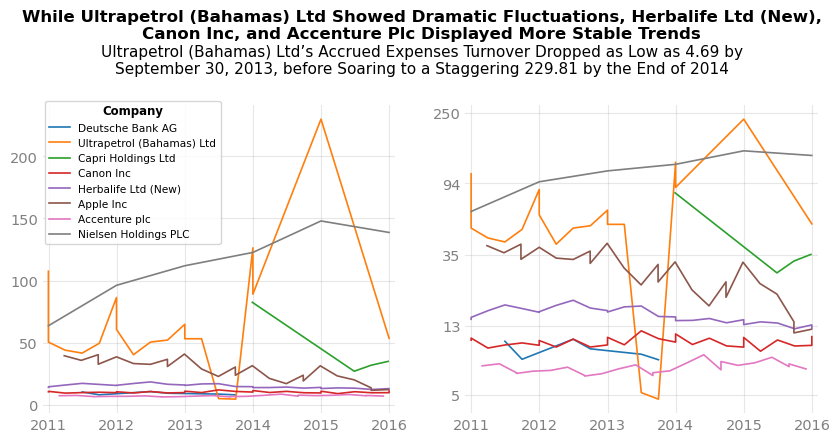

In [8]:
# Convert 'report_date' column to datetime format,
# and create a copy of `updated_df` with selected columns
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
key_data = updated_df[['company_name', 'report_date', 'amount']].copy()

# Adjust the minimum and maximum dates for visualization purposes
adjusted_min_date = key_data['report_date'].min() - pd.DateOffset(months=1)
adjusted_max_date = key_data['report_date'].max() + pd.DateOffset(months=1)


# Create a figure with two subplots, and add a main title and a subtitle
plt.figure(figsize=(10, 4))

plt.suptitle("While Ultrapetrol (Bahamas) Ltd Showed Dramatic Fluctuations, Herbalife Ltd (New),\n\
Canon Inc, and Accenture Plc Displayed More Stable Trends",
             x=0.504, y=1.12, fontsize=12, ha="center", fontweight='bold')
plt.figtext(s="Ultrapetrol (Bahamas) Ltd’s Accrued Expenses Turnover Dropped as Low as 4.69 by\n\
September 30, 2013, before Soaring to a Staggering 229.81 by the End of 2014",
            ha="center", x=0.504, y=0.96, size=11)


# Display and plot data for each company with linear scale
plt.subplot(1, 2, 1)

for company in key_data['company_name'].unique():
    company_data = key_data[key_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], linewidth=1.2, label=company)

# Customize the appearance of the 1st subplot
plt.legend(title='Company', title_fontproperties={'weight':'bold', 'size':8.4},
           fontsize=7.6, bbox_to_anchor=(0.52, 1.03))
plt.gca().set_xlim(adjusted_min_date, adjusted_max_date)
plt.gca().tick_params(axis='both', which='both', length=0)

for loc in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[loc].set_visible(False)
plt.xticks(size=10.5, color='grey')
plt.yticks(size=10.5, color='grey')
plt.grid(True, alpha=0.3)


# Display and plot data for each company with logarithmic scale to better visualize smaller values
plt.subplot(1, 2, 2)

for company in key_data['company_name'].unique():
    company_data = key_data[key_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], linewidth=1.2)

# Customize the appearance of the 2nd subplot
plt.yscale('log')
y_ticks = np.logspace(np.log10(5), np.log10(250), num=5)
y_ticks = np.round(y_ticks).astype(int)

plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(y_ticks)
plt.gca().set_xlim(adjusted_min_date, adjusted_max_date)
plt.gca().tick_params(axis='both', which='both', length=0)

for loc in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[loc].set_visible(False)
plt.xticks(size=10.5, color='grey')
plt.yticks(size=10.5, color='grey')
plt.grid(True, alpha=0.3)


# Display the plot
plt.show()

The chart presents two plots within a single figure, facilitating a direct comparison between linear and logarithmic scale representations. Using a logarithmic scale aids in enhancing the visualization of the overall data distribution by compressing larger values and expanding smaller ones.

This chart also highlightes the accrued expenses turnover of various companies from the start of `2011` to the end of `2015`. It depicts each company's financial efficiency, with lines tracking how frequently they managed to settle their accrued expenses over the five-year period.

While some companies, such as `Ultrapetrol (Bahamas) Ltd`, exhibited dramatic fluctuations, others like `Herbalife Ltd (New)`, `Canon Inc`, and `Accenture plc` demonstrated more stable trends. These visualizations enable us to compare and analyze the financial practices of different companies, and their efficiency in managing short-term liabilities throughout the observed years.

## 9. Analyzing Geographical Regions

Analyzing data by geographical regions involves grouping data by region, and calculating the average accrued expenses turnover for each country.

Understanding the performance of different geographical regions and stock exchanges is crucial in global financial analysis. This highlightes disparities and trends across different markets, and allows to identify which regions are performing well and which ones may require more attention.

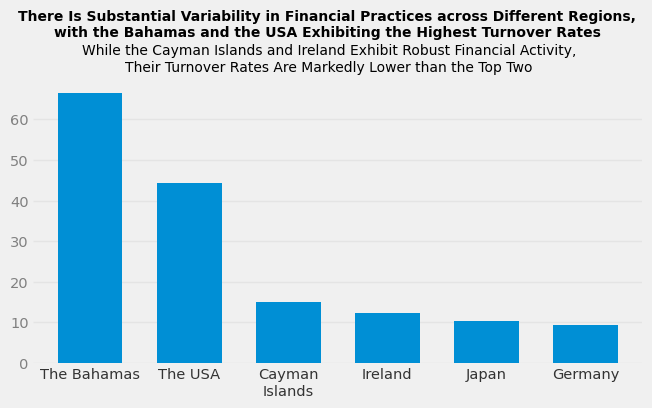

In [9]:
# Calculate and sort the average accrued expenses turnover by country
country_avg_expenses = updated_df.groupby('country')['amount'].mean()
country_avg_expenses = country_avg_expenses.sort_values(ascending=False)


# Set plot style and figure size
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3.5))

# Add a main title and a subtitle
plt.suptitle("There Is Substantial Variability in Financial Practices across Different Regions,\n"
             "with the Bahamas and the USA Exhibiting the Highest Turnover Rates",
             x=0.5, y=1.08, fontsize=10, ha="center", fontweight='bold')
plt.title("While the Cayman Islands and Ireland Exhibit Robust Financial Activity,\n"
          "Their Turnover Rates Are Markedly Lower than the Top Two",
          ha="center", x=0.485, y=1, fontsize=10)

# Plot the sorted average accrued expenses turnover as a bar chart
country_avg_expenses.plot(kind='bar', width=0.65)


# Customize the x- and y-axis labels
plt.xlabel('')
plt.xticks(ticks=range(6), rotation=0, size=10.5, color='#333333',
           labels=['The Bahamas', 'The USA', 'Cayman\nIslands', 'Ireland', 'Japan', 'Germany'])
plt.yticks(size=10.5, color='grey')

# Remove the spines (borders) of the plot
for loc in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[loc].set_visible(False)

# Customize grid visibility and appearance
plt.grid(alpha=0.3)
plt.grid(visible=False, axis='x')


# Display the plot
plt.show()

This plot showcases the average accrued expenses turnover for different countries. The `Bahamas` has the highest average turnover at `66.52`, indicating a higher frequency of accruing and paying off expenses compared to other countries. With an average accrued expenses turnover of `44.38`, the `USA` is the second-highest, demonstrating strong financial activity but still significantly behind the `Bahamas`.

The `Cayman Islands` and `Ireland` follow with averages of `15.06` and `12.35`, respectively. While they exhibit robust financial activity, their turnover rates are markedly lower than the top two. Moreover, `Japan` and `Germany` have the lowest averages, at `10.38` and `9.29`, respectively. This could indicate more stable or conservative financial practices, or possibly less frequent accrual and payment cycles.

## 10. Conclusion

In this project, we extracted financial data for specific companies to examine their accrued expenses turnover, and explore how this metric differs among companies and regions. To query our financial data, we identified the appropriate API endpoint and the necessary parameters. The JSON data we extracted from the `MER/F1` table contains comprehensive information; it is well-structured with most columns being self-explanatory. Additionally, the JSON structure allowed us to convert the data into a pandas DataFrame, enabling us to handle and analyze the data more effectively. After reviewing the dataset columns, we defined a list of `9` key columns essential for our goals. They provide crucial information about the financial reports such as their IDs, dates, types, as well as the financial metrics being reported.

To refine our analysis, we filtered the DataFrame to include only rows that mention the accrued expenses turnover metric. After filtering, the dataset comprised `139` entries and companies were spread across `7` countries and `4` regions, with the `USA` and `Latin America` having the highest representations. To enhance the quality of our information, we modified the country column to contain full country names, then renamed the column names to improve readability. Furthermore, we discovered that most companies are from the `United States of America`, followed by `Ireland`, `Japan`, and the `Cayman Islands`, with fewer companies from the `Bahamas` and `Germany`.

Our updated DataFrame covers data from the beginning of `2011` to the end of `2015`. We visualized the trends in yearly accrued expenses turnover using line plots, presenting two plots within a single figure to facilitate a direct comparison between linear and logarithmic scale representations. This figure depicts each company's financial efficiency, with lines tracking how frequently they managed to settle their accrued expenses over the five-year period. While some companies, such as `Ultrapetrol (Bahamas) Ltd`, exhibited dramatic fluctuations, others like `Herbalife Ltd (New)`, `Canon Inc`, and `Accenture plc` demonstrated more stable trends.

To analyze data by geographic regions, we showcased the average accrued expenses turnover for different countries using a bar chart. The results indicated that the `Bahamas` has the highest average turnover at `66.52`. The `USA` follows as the second-highest with an average of `44.38`, demonstrating strong financial activity, but still significantly behind the Bahamas. While the `Cayman Islands` and `Ireland` exhibit robust financial activity, their turnover rates of `15.06` and `12.35` are markedly lower than the top two. Moreover, `Japan` and `Germany` have the lowest averages, at `10.38` and `9.29`, respectively. This could indicate more stable or conservative financial practices, or possibly less frequent accrual and payment cycles.